In [1]:
# Basics
import pandas as pd

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

## ADP

In [3]:
# load in player fantasy stats data as player_df
adp_df = pd.read_csv('data/FantasyPros_2022_Overall_ADP_Rankings.csv')
adp_df.head()

,Rank,Player,Team,Bye,POS,ESPN,RTSports,MFL,Fantrax,FFC,Sleeper,AVG
0,1.0,Jonathan Taylor,IND,14.0,RB1,1.0,1.0,NaN,1.0,NaN,1.0,1.0
1,2.0,Christian McCaffrey,CAR,13.0,RB2,2.0,2.0,NaN,3.0,NaN,2.0,2.8
2,3.0,Austin Ekeler,LAC,8.0,RB3,4.0,3.0,NaN,2.0,NaN,4.0,3.0
3,4.0,Cooper Kupp,LAR,7.0,WR1,3.0,6.0,NaN,4.0,NaN,5.0,4.4
4,5.0,Derrick Henry,TEN,6.0,RB4,5.0,8.0,NaN,6.0,NaN,3.0,5.0


In [4]:
#Columns to drop
to_drop = ['Bye', 'POS', 'ESPN', 'RTSports', 'MFL', 'Fantrax', 'FFC', 'Sleeper', 'AVG']

# Drop columns
player_adp = adp_df.drop(to_drop, axis=1).dropna()
player_adp

,Rank,Player,Team
0,1.0,Jonathan Taylor,IND
1,2.0,Christian McCaffrey,CAR
2,3.0,Austin Ekeler,LAC
3,4.0,Cooper Kupp,LAR
4,5.0,Derrick Henry,TEN
...,...,...,...
438,439.0,Freddie Swain,SEA
439,440.0,Joe Flacco,NYJ
440,441.0,Tyrod Taylor,NYG
441,442.0,Harrison Bryant,CLE


In [5]:
player_adp['player_team'] = player_adp['Player'] + ' ('+ player_adp['Team'] + ')'
player_adp = player_adp.drop(columns = ['Player', 'Team'], axis = 1)

In [6]:
# pd.set_option('display.max_rows', 500)
player_adp = player_adp.rename(columns = {'player_team':'Player'})
player_adp = player_adp.head(200)
player_adp

,Rank,Player
0,1.0,Jonathan Taylor (IND)
1,2.0,Christian McCaffrey (CAR)
2,3.0,Austin Ekeler (LAC)
3,4.0,Cooper Kupp (LAR)
4,5.0,Derrick Henry (TEN)
5,6.0,Justin Jefferson (MIN)
6,7.0,Dalvin Cook (MIN)
7,8.0,Najee Harris (PIT)
8,9.0,Ja'Marr Chase (CIN)
9,10.0,Joe Mixon (CIN)


## Quarterbacks

### 2017

In [7]:
# assign file names
qb_2017 = ['qb_2017_w1','qb_2017_w2','qb_2017_w3','qb_2017_w4','qb_2017_w5','qb_2017_w6','qb_2017_w7'
          ,'qb_2017_w8','qb_2017_w9','qb_2017_w10','qb_2017_w11','qb_2017_w12','qb_2017_w13','qb_2017_w14'
          ,'qb_2017_w15','qb_2017_w16','qb_2017_w17']
 
# create empty list
qb_2017_list = []
 
# append datasets into the list
for i in range(len(qb_2017)):
    temp_df = pd.read_csv("./data/qb/2017/"+qb_2017[i]+".csv")
    qb_2017_list.append(temp_df)

# Assign new column for game date
qb_2017_list[0]['Date'] = pd.to_datetime('9/7/2017')    
qb_2017_list[1]['Date'] = pd.to_datetime('9/14/2017')
qb_2017_list[2]['Date'] = pd.to_datetime('9/21/2017')
qb_2017_list[3]['Date'] = pd.to_datetime('9/28/2017')
qb_2017_list[4]['Date'] = pd.to_datetime('10/5/2017')
qb_2017_list[5]['Date'] = pd.to_datetime('10/12/2017')
qb_2017_list[6]['Date'] = pd.to_datetime('10/19/2017')
qb_2017_list[7]['Date'] = pd.to_datetime('10/26/2017')
qb_2017_list[8]['Date'] = pd.to_datetime('11/2/2017')
qb_2017_list[9]['Date'] = pd.to_datetime('11/9/2017')
qb_2017_list[10]['Date'] = pd.to_datetime('11/16/2017')
qb_2017_list[11]['Date'] = pd.to_datetime('11/23/2017')
qb_2017_list[12]['Date'] = pd.to_datetime('11/30/2017')
qb_2017_list[13]['Date'] = pd.to_datetime('12/7/2017')
qb_2017_list[14]['Date'] = pd.to_datetime('12/14/2017')
qb_2017_list[15]['Date'] = pd.to_datetime('12/23/2017')
qb_2017_list[16]['Date'] = pd.to_datetime('12/31/2017')

# Merge dataframe with dates
qb_2017_df = pd.concat(qb_2017_list, axis=0, ignore_index=True).dropna()

### 2018

In [8]:
# assign file names
qb_2018 = ['qb_2018_w1','qb_2018_w2','qb_2018_w3','qb_2018_w4','qb_2018_w5','qb_2018_w6','qb_2018_w7'
          ,'qb_2018_w8','qb_2018_w9','qb_2018_w10','qb_2018_w11','qb_2018_w12','qb_2018_w13','qb_2018_w14'
          ,'qb_2018_w15','qb_2018_w16','qb_2018_w17']
 
# create empty list
qb_2018_list = []
 
# append datasets into the list
for i in range(len(qb_2018)):
    temp_df = pd.read_csv("./data/qb/2018/"+qb_2018[i]+".csv")
    qb_2018_list.append(temp_df)

# Assign new column for game date
qb_2018_list[0]['Date'] = pd.to_datetime('9/6/2018')    
qb_2018_list[1]['Date'] = pd.to_datetime('9/13/2018')
qb_2018_list[2]['Date'] = pd.to_datetime('9/20/2018')
qb_2018_list[3]['Date'] = pd.to_datetime('9/27/2018')
qb_2018_list[4]['Date'] = pd.to_datetime('10/4/2018')
qb_2018_list[5]['Date'] = pd.to_datetime('10/11/2018')
qb_2018_list[6]['Date'] = pd.to_datetime('10/18/2018')
qb_2018_list[7]['Date'] = pd.to_datetime('10/25/2018')
qb_2018_list[8]['Date'] = pd.to_datetime('11/1/2018')
qb_2018_list[9]['Date'] = pd.to_datetime('11/8/2018')
qb_2018_list[10]['Date'] = pd.to_datetime('11/15/2018')
qb_2018_list[11]['Date'] = pd.to_datetime('11/22/2018')
qb_2018_list[12]['Date'] = pd.to_datetime('11/29/2018')
qb_2018_list[13]['Date'] = pd.to_datetime('12/6/2018')
qb_2018_list[14]['Date'] = pd.to_datetime('12/13/2018')
qb_2018_list[15]['Date'] = pd.to_datetime('12/22/2018')
qb_2018_list[16]['Date'] = pd.to_datetime('12/30/2018')

# Merge dataframe with dates
qb_2018_df = pd.concat(qb_2018_list, axis=0, ignore_index=True).dropna()

### 2019

In [9]:
# assign file names
qb_2019 = ['qb_2019_w1','qb_2019_w2','qb_2019_w3','qb_2019_w4','qb_2019_w5','qb_2019_w6','qb_2019_w7'
          ,'qb_2019_w8','qb_2019_w9','qb_2019_w10','qb_2019_w11','qb_2019_w12','qb_2019_w13','qb_2019_w14'
          ,'qb_2019_w15','qb_2019_w16','qb_2019_w17']
 
# create empty list
qb_2019_list = []
 
# append datasets into the list
for i in range(len(qb_2019)):
    temp_df = pd.read_csv("./data/qb/2019/"+qb_2019[i]+".csv")
    qb_2019_list.append(temp_df)

# Assign new column for game date
qb_2019_list[0]['Date'] = pd.to_datetime('9/5/2019')    
qb_2019_list[1]['Date'] = pd.to_datetime('9/12/2019')
qb_2019_list[2]['Date'] = pd.to_datetime('9/19/2019')
qb_2019_list[3]['Date'] = pd.to_datetime('9/26/2019')
qb_2019_list[4]['Date'] = pd.to_datetime('10/3/2019')
qb_2019_list[5]['Date'] = pd.to_datetime('10/10/2019')
qb_2019_list[6]['Date'] = pd.to_datetime('10/17/2019')
qb_2019_list[7]['Date'] = pd.to_datetime('10/24/2019')
qb_2019_list[8]['Date'] = pd.to_datetime('10/31/2019')
qb_2019_list[9]['Date'] = pd.to_datetime('11/7/2019')
qb_2019_list[10]['Date'] = pd.to_datetime('11/14/2019')
qb_2019_list[11]['Date'] = pd.to_datetime('11/21/2019')
qb_2019_list[12]['Date'] = pd.to_datetime('11/28/2019')
qb_2019_list[13]['Date'] = pd.to_datetime('12/5/2019')
qb_2019_list[14]['Date'] = pd.to_datetime('12/12/2019')
qb_2019_list[15]['Date'] = pd.to_datetime('12/20/2019')
qb_2019_list[16]['Date'] = pd.to_datetime('12/27/2019')

# Merge dataframe with dates
qb_2019_df = pd.concat(qb_2019_list, axis=0, ignore_index=True).dropna()

### 2020

In [10]:
# assign file names
qb_2020 = ['qb_2020_w1','qb_2020_w2','qb_2020_w3','qb_2020_w4','qb_2020_w5','qb_2020_w6','qb_2020_w7'
          ,'qb_2020_w8','qb_2020_w9','qb_2020_w10','qb_2020_w11','qb_2020_w12','qb_2020_w13','qb_2020_w14'
          ,'qb_2020_w15','qb_2020_w16','qb_2020_w17']
 
# create empty list
qb_2020_list = []
 
# append datasets into the list
for i in range(len(qb_2020)):
    temp_df = pd.read_csv("./data/qb/2020/"+qb_2020[i]+".csv")
    qb_2020_list.append(temp_df)

# Assign new column for game date
qb_2020_list[0]['Date'] = pd.to_datetime('9/10/2020')    
qb_2020_list[1]['Date'] = pd.to_datetime('9/17/2020')
qb_2020_list[2]['Date'] = pd.to_datetime('9/24/2020')
qb_2020_list[3]['Date'] = pd.to_datetime('10/1/2020')
qb_2020_list[4]['Date'] = pd.to_datetime('10/8/2020')
qb_2020_list[5]['Date'] = pd.to_datetime('10/15/2020')
qb_2020_list[6]['Date'] = pd.to_datetime('10/22/2020')
qb_2020_list[7]['Date'] = pd.to_datetime('10/29/2020')
qb_2020_list[8]['Date'] = pd.to_datetime('11/5/2020')
qb_2020_list[9]['Date'] = pd.to_datetime('11/12/2020')
qb_2020_list[10]['Date'] = pd.to_datetime('11/19/2020')
qb_2020_list[11]['Date'] = pd.to_datetime('11/26/2020')
qb_2020_list[12]['Date'] = pd.to_datetime('12/3/2020')
qb_2020_list[13]['Date'] = pd.to_datetime('12/10/2020')
qb_2020_list[14]['Date'] = pd.to_datetime('12/17/2020')
qb_2020_list[15]['Date'] = pd.to_datetime('12/24/2020')
qb_2020_list[16]['Date'] = pd.to_datetime('1/3/2021')

# Merge dataframe with dates
qb_2020_df = pd.concat(qb_2020_list, axis=0, ignore_index=True).dropna()

### 2021

In [11]:
# assign file names
qb_2021 = ['qb_2021_w1','qb_2021_w2','qb_2021_w3','qb_2021_w4','qb_2021_w5','qb_2021_w6','qb_2021_w7'
          ,'qb_2021_w8','qb_2021_w9','qb_2021_w10','qb_2021_w11','qb_2021_w12','qb_2021_w13','qb_2021_w14'
          ,'qb_2021_w15','qb_2021_w16','qb_2021_w17']
 
# create empty list
qb_2021_list = []
 
# append datasets into the list
for i in range(len(qb_2021)):
    temp_df = pd.read_csv("./data/qb/2021/"+qb_2021[i]+".csv")
    qb_2021_list.append(temp_df)

# Assign new column for game date
qb_2021_list[0]['Date'] = pd.to_datetime('9/9/2021')    
qb_2021_list[1]['Date'] = pd.to_datetime('9/6/2021')
qb_2021_list[2]['Date'] = pd.to_datetime('9/23/2021')
qb_2021_list[3]['Date'] = pd.to_datetime('09/30/2021')
qb_2021_list[4]['Date'] = pd.to_datetime('10/7/2021')
qb_2021_list[5]['Date'] = pd.to_datetime('10/14/2021')
qb_2021_list[6]['Date'] = pd.to_datetime('10/21/2021')
qb_2021_list[7]['Date'] = pd.to_datetime('10/28/2021')
qb_2021_list[8]['Date'] = pd.to_datetime('11/4/2021')
qb_2021_list[9]['Date'] = pd.to_datetime('11/11/2021')
qb_2021_list[10]['Date'] = pd.to_datetime('11/18/2021')
qb_2021_list[11]['Date'] = pd.to_datetime('11/25/2021')
qb_2021_list[12]['Date'] = pd.to_datetime('12/2/2021')
qb_2021_list[13]['Date'] = pd.to_datetime('12/9/2021')
qb_2021_list[14]['Date'] = pd.to_datetime('12/16/2021')
qb_2021_list[15]['Date'] = pd.to_datetime('12/23/2021')
qb_2021_list[16]['Date'] = pd.to_datetime('1/2/2022')

# Merge dataframe with dates
qb_2021_df = pd.concat(qb_2021_list, axis=0, ignore_index=True).dropna()

In [12]:
# Make list of dataframe to merge all 5 year together
qb_list = [qb_2017_df, qb_2018_df, qb_2019_df, qb_2020_df, qb_2021_df]

# Merge dataframes
qb_df = pd.concat(qb_list, axis=0, ignore_index=True).dropna()
qb_df

,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Alex Smith (FA),28.0,35.0,80.0,368.0,10.5,4.0,0.0,3.0,5.0,3.0,0.0,0.0,1.0,31.0,31.0,5.0%,2017-09-07
1,2.0,Matthew Stafford (LAR),29.0,41.0,70.7,292.0,7.1,4.0,1.0,1.0,2.0,14.0,0.0,0.0,1.0,27.1,27.1,94.0%,2017-09-07
2,3.0,Sam Bradford (FA),27.0,32.0,84.4,346.0,10.8,3.0,0.0,1.0,2.0,-3.0,0.0,0.0,1.0,25.5,25.5,0.0%,2017-09-07
3,4.0,Trevor Siemian (CHI),17.0,28.0,60.7,219.0,7.8,2.0,1.0,4.0,6.0,19.0,1.0,0.0,1.0,22.7,22.7,0.0%,2017-09-07
4,5.0,Carson Wentz (WAS),26.0,39.0,66.7,307.0,7.9,2.0,1.0,2.0,4.0,6.0,0.0,1.0,1.0,18.9,18.9,14.0%,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,118.0,Teddy Bridgewater (MIA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0%,2022-01-02
4487,119.0,Trevor Siemian (CHI),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
4488,120.0,Jared Goff (DET),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0%,2022-01-02
4489,121.0,Jameis Winston (NO),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0%,2022-01-02


In [13]:
#Columns to drop
to_drop = ['Rank', 'CMP', 'ATT', 'PCT', 'YDS', 'Y/A', 'TD', 'INT', 'SACKS', 'ATT.1', 'YDS.1', 'TD.1', 'FL', 
          'G', 'FPTS/G', 'ROST']

# Drop columns
qb_ts = qb_df.drop(to_drop, axis=1) 

# Merge player data by making dictionary and converting to DataFrame
qb_ts = pd.DataFrame(qb_ts.groupby(['Player'])['Date', 'FPTS'].apply(lambda grp: dict(grp.values))
                     .to_dict()).sort_index()

qb_ts

,AJ McCarron (FA),Aaron Rodgers (GB),Alex Smith (FA),Alex Tanney (FA),Andrew Luck (FA),Andy Dalton (NO),Anthony Brown (BAL),Armani Rogers (WAS),Austin Davis (FA),Bailey Zappe (NE),...,Trace McSorley (ARI),Trevor Lawrence (JAC),Trevor Siemian (CHI),Trey Lance (SF),Tua Tagovailoa (MIA),Tyler Bray (FA),Tyler Huntley (BAL),Tyrod Taylor (NYG),Will Grier (DAL),Zach Wilson (NYJ)
2017-09-07,NaN,16.5,31.0,NaN,NaN,-3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,22.7,NaN,NaN,NaN,NaN,18.8,NaN,NaN
2017-09-14,NaN,18.5,16.1,NaN,NaN,9.5,NaN,NaN,NaN,NaN,...,NaN,NaN,22.6,NaN,NaN,NaN,NaN,10.5,NaN,NaN
2017-09-21,NaN,24.8,15.1,NaN,NaN,16.3,NaN,NaN,NaN,NaN,...,NaN,NaN,7.6,NaN,NaN,NaN,NaN,17.8,NaN,NaN
2017-09-28,0.0,23.1,27.3,NaN,NaN,28.3,NaN,NaN,NaN,NaN,...,NaN,NaN,11.3,NaN,NaN,NaN,NaN,12.5,NaN,NaN
2017-10-05,NaN,24.0,26.9,NaN,NaN,13.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.9,NaN,NaN
2017-10-12,NaN,0.7,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-19,NaN,NaN,25.7,NaN,NaN,10.4,NaN,NaN,-0.1,NaN,...,NaN,NaN,5.7,NaN,NaN,NaN,NaN,20.0,NaN,NaN
2017-10-26,NaN,NaN,13.4,NaN,NaN,18.7,NaN,NaN,NaN,NaN,...,NaN,NaN,7.9,NaN,NaN,NaN,NaN,16.7,NaN,NaN
2017-11-02,NaN,NaN,18.4,NaN,NaN,5.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.9,NaN,NaN
2017-11-09,NaN,NaN,NaN,NaN,NaN,14.6,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN


In [14]:
# List of columns to drop for players not in top 200 adp
dropped_columns = []

# Loop through columns and drop players not in adp
for player in qb_ts.columns.values:
    if player not in player_adp['Player'].values:
        dropped_columns.append(player)


qb_ts = qb_ts.drop(dropped_columns, axis=1)
qb_ts.to_csv('data/qb_ts.csv')

In [15]:
qb_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2017-09-07 to 2022-01-02
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aaron Rodgers (GB)       72 non-null     float64
 1   Baker Mayfield (CAR)     63 non-null     float64
 2   Dak Prescott (DAL)       70 non-null     float64
 3   Derek Carr (LV)          80 non-null     float64
 4   Deshaun Watson (CLE)     71 non-null     float64
 5   Jalen Hurts (PHI)        32 non-null     float64
 6   Jameis Winston (NO)      61 non-null     float64
 7   Joe Burrow (CIN)         27 non-null     float64
 8   Josh Allen (BUF)         61 non-null     float64
 9   Justin Fields (CHI)      17 non-null     float64
 10  Justin Herbert (LAC)     32 non-null     float64
 11  Kirk Cousins (MIN)       80 non-null     float64
 12  Kyler Murray (ARI)       49 non-null     float64
 13  Lamar Jackson (BAL)      63 non-null     float64
 14  Mac Jone

## Running Backs

### 2017

In [16]:
# assign file names
rb_2017 = ['rb_2017_w1','rb_2017_w2','rb_2017_w3','rb_2017_w4','rb_2017_w5','rb_2017_w6','rb_2017_w7'
          ,'rb_2017_w8','rb_2017_w9','rb_2017_w10','rb_2017_w11','rb_2017_w12','rb_2017_w13','rb_2017_w14'
          ,'rb_2017_w15','rb_2017_w16','rb_2017_w17']
 
# create empty list
rb_2017_list = []
 
# append datasets into the list
for i in range(len(rb_2017)):
    temp_df = pd.read_csv("./data/rb/2017/"+rb_2017[i]+".csv")
    rb_2017_list.append(temp_df)

# Assign new column for game date
rb_2017_list[0]['Date'] = pd.to_datetime('9/7/2017')    
rb_2017_list[1]['Date'] = pd.to_datetime('9/14/2017')
rb_2017_list[2]['Date'] = pd.to_datetime('9/21/2017')
rb_2017_list[3]['Date'] = pd.to_datetime('9/28/2017')
rb_2017_list[4]['Date'] = pd.to_datetime('10/5/2017')
rb_2017_list[5]['Date'] = pd.to_datetime('10/12/2017')
rb_2017_list[6]['Date'] = pd.to_datetime('10/19/2017')
rb_2017_list[7]['Date'] = pd.to_datetime('10/26/2017')
rb_2017_list[8]['Date'] = pd.to_datetime('11/2/2017')
rb_2017_list[9]['Date'] = pd.to_datetime('11/9/2017')
rb_2017_list[10]['Date'] = pd.to_datetime('11/16/2017')
rb_2017_list[11]['Date'] = pd.to_datetime('11/23/2017')
rb_2017_list[12]['Date'] = pd.to_datetime('11/30/2017')
rb_2017_list[13]['Date'] = pd.to_datetime('12/7/2017')
rb_2017_list[14]['Date'] = pd.to_datetime('12/14/2017')
rb_2017_list[15]['Date'] = pd.to_datetime('12/23/2017')
rb_2017_list[16]['Date'] = pd.to_datetime('12/31/2017')
    
# Merge dataframe with dates    
rb_2017_df = pd.concat(rb_2017_list, axis=0, ignore_index=True).dropna()
rb_2017_df

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Kareem Hunt (CLE),17.0,148.0,8.7,58.0,1.0,1.0,5.0,5.0,98.0,19.6,2.0,1.0,1.0,45.6,45.6,89.0%,2017-09-07
1,2.0,Tarik Cohen (FA),5.0,66.0,13.2,46.0,1.0,0.0,8.0,12.0,47.0,5.9,1.0,0.0,1.0,25.3,25.3,0.0%,2017-09-07
2,3.0,Mike Gillislee (FA),15.0,45.0,3.0,16.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.5,22.5,0.0%,2017-09-07
3,4.0,Leonard Fournette (TB),26.0,100.0,3.8,17.0,0.0,1.0,3.0,3.0,24.0,8.0,0.0,0.0,1.0,21.4,21.4,100.0%,2017-09-07
4,5.0,LeSean McCoy (FA),22.0,110.0,5.0,27.0,3.0,0.0,5.0,6.0,49.0,9.8,0.0,0.0,1.0,20.9,20.9,2.0%,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,112.0,Aaron Ripkowski (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
1993,113.0,Bronson Hill (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
1994,114.0,Terron Ward (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
1995,115.0,Matt Jones (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31


### 2018

In [17]:
# assign file names
rb_2018 = ['rb_2018_w1','rb_2018_w2','rb_2018_w3','rb_2018_w4','rb_2018_w5','rb_2018_w6','rb_2018_w7'
          ,'rb_2018_w8','rb_2018_w9','rb_2018_w10','rb_2018_w11','rb_2018_w12','rb_2018_w13','rb_2018_w14'
          ,'rb_2018_w15','rb_2018_w16','rb_2018_w17']
 
# create empty list
rb_2018_list = []
 
# append datasets into the list
for i in range(len(rb_2018)):
    temp_df = pd.read_csv("./data/rb/2018/"+rb_2018[i]+".csv")
    rb_2018_list.append(temp_df)

# Assign new column for game date
rb_2018_list[0]['Date'] = pd.to_datetime('9/6/2018')    
rb_2018_list[1]['Date'] = pd.to_datetime('9/13/2018')
rb_2018_list[2]['Date'] = pd.to_datetime('9/20/2018')
rb_2018_list[3]['Date'] = pd.to_datetime('9/27/2018')
rb_2018_list[4]['Date'] = pd.to_datetime('10/4/2018')
rb_2018_list[5]['Date'] = pd.to_datetime('10/11/2018')
rb_2018_list[6]['Date'] = pd.to_datetime('10/18/2018')
rb_2018_list[7]['Date'] = pd.to_datetime('10/25/2018')
rb_2018_list[8]['Date'] = pd.to_datetime('11/1/2018')
rb_2018_list[9]['Date'] = pd.to_datetime('11/8/2018')
rb_2018_list[10]['Date'] = pd.to_datetime('11/15/2018')
rb_2018_list[11]['Date'] = pd.to_datetime('11/22/2018')
rb_2018_list[12]['Date'] = pd.to_datetime('11/29/2018')
rb_2018_list[13]['Date'] = pd.to_datetime('12/6/2018')
rb_2018_list[14]['Date'] = pd.to_datetime('12/13/2018')
rb_2018_list[15]['Date'] = pd.to_datetime('12/22/2018')
rb_2018_list[16]['Date'] = pd.to_datetime('12/30/2018')

# Merge dataframe with dates
rb_2018_df = pd.concat(rb_2018_list, axis=0, ignore_index=True).dropna()
rb_2018_df

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Alvin Kamara (NO),8.0,29.0,3.6,10.0,0.0,2.0,9.0,12.0,112.0,12.4,1.0,0.0,1.0,43.1,43.1,100.0%,2018-09-06
1,2.0,James Conner (ARI),31.0,132.0,4.3,22.0,1.0,2.0,5.0,6.0,57.0,11.4,0.0,1.0,1.0,33.9,33.9,99.0%,2018-09-06
2,3.0,Melvin Gordon III (DEN),15.0,64.0,4.3,18.0,0.0,0.0,9.0,13.0,102.0,11.3,0.0,0.0,1.0,27.6,27.6,88.0%,2018-09-06
3,4.0,Joe Mixon (CIN),17.0,95.0,5.6,27.0,1.0,1.0,5.0,7.0,54.0,10.8,0.0,0.0,1.0,25.9,25.9,100.0%,2018-09-06
4,5.0,Chris Thompson (FA),5.0,65.0,13.0,16.0,0.0,0.0,6.0,7.0,63.0,10.5,1.0,0.0,1.0,24.8,24.8,0.0%,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,112.0,Damien Williams (ATL),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0%,2018-12-30
1884,113.0,Raheem Mostert (MIA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0%,2018-12-30
1885,114.0,Roosevelt Nix (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30
1886,115.0,LeGarrette Blount (FA),4.0,-3.0,-0.8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.3,-0.3,0.0%,2018-12-30


### 2019

In [18]:
# assign file names
rb_2019 = ['rb_2019_w1','rb_2019_w2','rb_2019_w3','rb_2019_w4','rb_2019_w5','rb_2019_w6','rb_2019_w7'
          ,'rb_2019_w8','rb_2019_w9','rb_2019_w10','rb_2019_w11','rb_2019_w12','rb_2019_w13','rb_2019_w14'
          ,'rb_2019_w15','rb_2019_w16','rb_2019_w17']
 
# create empty list
rb_2019_list = []
 
# append datasets into the list
for i in range(len(rb_2019)):
    temp_df = pd.read_csv("./data/rb/2019/"+rb_2019[i]+".csv")
    rb_2019_list.append(temp_df)

# Assign new column for game date
rb_2019_list[0]['Date'] = pd.to_datetime('9/5/2019')    
rb_2019_list[1]['Date'] = pd.to_datetime('9/12/2019')
rb_2019_list[2]['Date'] = pd.to_datetime('9/19/2019')
rb_2019_list[3]['Date'] = pd.to_datetime('9/26/2019')
rb_2019_list[4]['Date'] = pd.to_datetime('10/3/2019')
rb_2019_list[5]['Date'] = pd.to_datetime('10/10/2019')
rb_2019_list[6]['Date'] = pd.to_datetime('10/17/2019')
rb_2019_list[7]['Date'] = pd.to_datetime('10/24/2019')
rb_2019_list[8]['Date'] = pd.to_datetime('10/31/2019')
rb_2019_list[9]['Date'] = pd.to_datetime('11/7/2019')
rb_2019_list[10]['Date'] = pd.to_datetime('11/14/2019')
rb_2019_list[11]['Date'] = pd.to_datetime('11/21/2019')
rb_2019_list[12]['Date'] = pd.to_datetime('11/28/2019')
rb_2019_list[13]['Date'] = pd.to_datetime('12/5/2019')
rb_2019_list[14]['Date'] = pd.to_datetime('12/12/2019')
rb_2019_list[15]['Date'] = pd.to_datetime('12/20/2019')
rb_2019_list[16]['Date'] = pd.to_datetime('12/27/2019')

# Merge dataframe with dates
rb_2019_df = pd.concat(rb_2019_list, axis=0, ignore_index=True).dropna()
rb_2019_df

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Christian McCaffrey (CAR),19.0,128.0,6.7,23.0,1.0,2.0,10.0,11.0,81.0,8.1,0.0,0.0,1.0,42.9,42.9,100.0%,2019-09-05
1,2.0,Austin Ekeler (LAC),12.0,58.0,4.8,19.0,0.0,1.0,6.0,7.0,96.0,16.0,2.0,0.0,1.0,39.4,39.4,100.0%,2019-09-05
2,3.0,Derrick Henry (TEN),19.0,84.0,4.4,18.0,0.0,1.0,1.0,2.0,75.0,75.0,1.0,0.0,1.0,28.9,28.9,100.0%,2019-09-05
3,4.0,Dalvin Cook (MIN),21.0,111.0,5.3,22.0,2.0,2.0,2.0,2.0,9.0,4.5,0.0,0.0,1.0,26.0,26.0,100.0%,2019-09-05
4,5.0,David Johnson (FA),18.0,82.0,4.6,18.0,0.0,0.0,6.0,7.0,55.0,9.2,1.0,0.0,1.0,25.7,25.7,0.0%,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,114.0,Rod Smith (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27
2013,115.0,Ty Montgomery (NE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0%,2019-12-27
2014,116.0,Michael Burton (KC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27
2015,117.0,Chase Edmonds (MIA),1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.1,-0.1,91.0%,2019-12-27


### 2020

In [19]:
# assign file names
rb_2020 = ['rb_2020_w1','rb_2020_w2','rb_2020_w3','rb_2020_w4','rb_2020_w5','rb_2020_w6','rb_2020_w7'
          ,'rb_2020_w8','rb_2020_w9','rb_2020_w10','rb_2020_w11','rb_2020_w12','rb_2020_w13','rb_2020_w14'
          ,'rb_2020_w15','rb_2020_w16','rb_2020_w17']
 
# create empty list
rb_2020_list = []
 
# append datasets into the list
for i in range(len(rb_2020)):
    temp_df = pd.read_csv("./data/rb/2020/"+rb_2020[i]+".csv")
    rb_2020_list.append(temp_df)

# Assign new column for game date
rb_2020_list[0]['Date'] = pd.to_datetime('9/10/2020')    
rb_2020_list[1]['Date'] = pd.to_datetime('9/17/2020')
rb_2020_list[2]['Date'] = pd.to_datetime('9/24/2020')
rb_2020_list[3]['Date'] = pd.to_datetime('10/1/2020')
rb_2020_list[4]['Date'] = pd.to_datetime('10/8/2020')
rb_2020_list[5]['Date'] = pd.to_datetime('10/15/2020')
rb_2020_list[6]['Date'] = pd.to_datetime('10/22/2020')
rb_2020_list[7]['Date'] = pd.to_datetime('10/29/2020')
rb_2020_list[8]['Date'] = pd.to_datetime('11/5/2020')
rb_2020_list[9]['Date'] = pd.to_datetime('11/12/2020')
rb_2020_list[10]['Date'] = pd.to_datetime('11/19/2020')
rb_2020_list[11]['Date'] = pd.to_datetime('11/26/2020')
rb_2020_list[12]['Date'] = pd.to_datetime('12/3/2020')
rb_2020_list[13]['Date'] = pd.to_datetime('12/10/2020')
rb_2020_list[14]['Date'] = pd.to_datetime('12/17/2020')
rb_2020_list[15]['Date'] = pd.to_datetime('12/24/2020')
rb_2020_list[16]['Date'] = pd.to_datetime('1/3/2021')

# Merge dataframe with dates
rb_2020_df = pd.concat(rb_2020_list, axis=0, ignore_index=True).dropna()
rb_2020_df

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Josh Jacobs (LV),25.0,93.0,3.7,14.0,0.0,3.0,4.0,6.0,46.0,11.5,0.0,0.0,1.0,35.9,35.9,96.0%,2020-09-10
1,2.0,Christian McCaffrey (CAR),23.0,97.0,4.2,15.0,0.0,2.0,3.0,4.0,38.0,12.7,0.0,0.0,1.0,28.5,28.5,100.0%,2020-09-10
2,3.0,Ezekiel Elliott (DAL),22.0,96.0,4.4,14.0,0.0,1.0,3.0,4.0,31.0,10.3,1.0,0.0,1.0,27.7,27.7,99.0%,2020-09-10
3,4.0,Nyheim Hines (IND),7.0,28.0,4.0,12.0,0.0,1.0,8.0,8.0,45.0,5.6,1.0,0.0,1.0,27.3,27.3,62.0%,2020-09-10
4,5.0,Malcolm Brown (FA),18.0,79.0,4.4,12.0,0.0,2.0,3.0,4.0,31.0,10.3,0.0,0.0,1.0,26.0,26.0,0.0%,2020-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,113.0,Jeremy McNichols (PIT),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03
1995,114.0,Alex Armah Jr. (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03
1996,115.0,Keith Smith (ATL),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03
1997,116.0,Tevin Coleman (NYJ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03


### 2021

In [20]:
# assign file names
rb_2021 = ['rb_2021_w1','rb_2021_w2','rb_2021_w3','rb_2021_w4','rb_2021_w5','rb_2021_w6','rb_2021_w7'
          ,'rb_2021_w8','rb_2021_w9','rb_2021_w10','rb_2021_w11','rb_2021_w12','rb_2021_w13','rb_2021_w14'
          ,'rb_2021_w15','rb_2021_w16','rb_2021_w17']
 
# create empty list
rb_2021_list = []
 
# append datasets into the list
for i in range(len(rb_2021)):
    temp_df = pd.read_csv("./data/rb/2021/"+rb_2021[i]+".csv")
    rb_2021_list.append(temp_df)

# Assign new column for game date
rb_2021_list[0]['Date'] = pd.to_datetime('9/9/2021')    
rb_2021_list[1]['Date'] = pd.to_datetime('9/6/2021')
rb_2021_list[2]['Date'] = pd.to_datetime('9/23/2021')
rb_2021_list[3]['Date'] = pd.to_datetime('09/30/2021')
rb_2021_list[4]['Date'] = pd.to_datetime('10/7/2021')
rb_2021_list[5]['Date'] = pd.to_datetime('10/14/2021')
rb_2021_list[6]['Date'] = pd.to_datetime('10/21/2021')
rb_2021_list[7]['Date'] = pd.to_datetime('10/28/2021')
rb_2021_list[8]['Date'] = pd.to_datetime('11/4/2021')
rb_2021_list[9]['Date'] = pd.to_datetime('11/11/2021')
rb_2021_list[10]['Date'] = pd.to_datetime('11/18/2021')
rb_2021_list[11]['Date'] = pd.to_datetime('11/25/2021')
rb_2021_list[12]['Date'] = pd.to_datetime('12/2/2021')
rb_2021_list[13]['Date'] = pd.to_datetime('12/9/2021')
rb_2021_list[14]['Date'] = pd.to_datetime('12/16/2021')
rb_2021_list[15]['Date'] = pd.to_datetime('12/23/2021')
rb_2021_list[16]['Date'] = pd.to_datetime('1/2/2022')

# Merge dataframe with dates
rb_2021_df = pd.concat(rb_2021_list, axis=0, ignore_index=True).dropna()
rb_2021_df

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Christian McCaffrey (CAR),21.0,98.0,4.7,18.0,0.0,0.0,9.0,9.0,89.0,9.9,0.0,0.0,1.0,27.7,27.7,100.0%,2021-09-09
1,2.0,Joe Mixon (CIN),29.0,127.0,4.4,19.0,0.0,1.0,4.0,4.0,23.0,5.8,0.0,0.0,1.0,25.0,25.0,100.0%,2021-09-09
2,3.0,Jamaal Williams (DET),9.0,54.0,6.0,20.0,1.0,1.0,8.0,9.0,56.0,7.0,0.0,0.0,1.0,25.0,25.0,39.0%,2021-09-09
3,4.0,D'Andre Swift (DET),11.0,39.0,3.5,16.0,0.0,0.0,8.0,11.0,65.0,8.1,1.0,0.0,1.0,24.4,24.4,100.0%,2021-09-09
4,5.0,Nick Chubb (CLE),15.0,83.0,5.5,18.0,0.0,2.0,2.0,2.0,18.0,9.0,0.0,1.0,1.0,22.1,22.1,100.0%,2021-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,239.0,Jerick McKinnon (KC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0%,2022-01-02
4176,241.0,Tevin Coleman (NYJ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
4177,242.0,Keith Smith (ATL),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2022-01-02
4179,244.0,Tony Jones Jr. (NO),1.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.2,-0.2,0.0%,2022-01-02


In [21]:
# Make list of dataframe to merge all 5 year together
rb_list = [rb_2017_df, rb_2018_df, rb_2019_df, rb_2020_df, rb_2021_df]

# Merge dataframes
rb_df = pd.concat(rb_list, axis=0, ignore_index=True).dropna()
rb_df

,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Kareem Hunt (CLE),17.0,148.0,8.7,58.0,1.0,1.0,5.0,5.0,98.0,19.6,2.0,1.0,1.0,45.6,45.6,89.0%,2017-09-07
1,2.0,Tarik Cohen (FA),5.0,66.0,13.2,46.0,1.0,0.0,8.0,12.0,47.0,5.9,1.0,0.0,1.0,25.3,25.3,0.0%,2017-09-07
2,3.0,Mike Gillislee (FA),15.0,45.0,3.0,16.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.5,22.5,0.0%,2017-09-07
3,4.0,Leonard Fournette (TB),26.0,100.0,3.8,17.0,0.0,1.0,3.0,3.0,24.0,8.0,0.0,0.0,1.0,21.4,21.4,100.0%,2017-09-07
4,5.0,LeSean McCoy (FA),22.0,110.0,5.0,27.0,3.0,0.0,5.0,6.0,49.0,9.8,0.0,0.0,1.0,20.9,20.9,2.0%,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11588,239.0,Jerick McKinnon (KC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0%,2022-01-02
11589,241.0,Tevin Coleman (NYJ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
11590,242.0,Keith Smith (ATL),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2022-01-02
11591,244.0,Tony Jones Jr. (NO),1.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.2,-0.2,0.0%,2022-01-02


In [22]:
#Columns to drop
to_drop = ['Rank', 'ATT', 'YDS', 'Y/A', 'LG', '20+', 'TD', 'REC', 'TGT', 'Y/R', 'YDS.1', 'TD.1', 'FL', 
          'G', 'FPTS/G', 'ROST']

# Drop columns
rb_ts = rb_df.drop(to_drop, axis=1) 

# Merge player data by making dictionary and converting to DataFrame
rb_ts = pd.DataFrame(rb_ts.groupby(['Player'])['Date', 'FPTS'].apply(lambda grp: dict(grp.values))
                     .to_dict()).sort_index()

rb_ts

,AJ Dillon (GB),Aaron Jones (GB),Aaron Ripkowski (FA),Aaron Shampklin (DAL),Abram Smith (NO),Adam Prentice (NO),Adrian Killins Jr. (FA),Adrian Peterson (FA),Akeem Hunt (FA),Alec Ingold (MIA),...,Wendell Smallwood (FA),Wes Hills (FA),Xavier Jones (FA),ZaQuandre White (MIA),Zach Line (FA),Zach Zenner (FA),Zack Moss (BUF),Zamir White (LV),Zander Horvath (LAC),Zonovan Knight (NYJ)
2017-09-07,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.8,NaN,NaN,...,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-14,NaN,0.0,1.2,NaN,NaN,NaN,NaN,2.6,0.0,NaN,...,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-21,NaN,0.0,0.0,NaN,NaN,NaN,NaN,5.7,0.0,NaN,...,9.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN
2017-09-28,NaN,10.9,2.0,NaN,NaN,NaN,NaN,0.4,0.0,NaN,...,17.9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2017-10-05,NaN,20.4,0.2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.1,NaN,NaN,NaN,NaN
2017-10-12,NaN,5.2,1.0,NaN,NaN,NaN,NaN,25.4,0.3,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2017-10-19,NaN,22.8,0.0,NaN,NaN,NaN,NaN,4.3,1.1,NaN,...,5.9,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2017-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2.4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2017-11-02,NaN,3.1,1.9,NaN,NaN,NaN,NaN,16.7,0.0,NaN,...,2.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN
2017-11-09,NaN,2.2,2.5,NaN,NaN,NaN,NaN,3.2,NaN,NaN,...,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN


In [23]:
# List of columns to drop for players not in top 200 adp
dropped_columns = []

# Loop through columns and drop players not in adp
for player in rb_ts.columns.values:
    if player not in player_adp['Player'].values:
        dropped_columns.append(player)


rb_ts = rb_ts.drop(dropped_columns, axis=1)
rb_ts.to_csv('data/rb_ts.csv')  

In [24]:
rb_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2017-09-07 to 2022-01-02
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AJ Dillon (GB)               28 non-null     float64
 1   Aaron Jones (GB)             71 non-null     float64
 2   Alexander Mattison (MIN)     43 non-null     float64
 3   Alvin Kamara (NO)            78 non-null     float64
 4   Antonio Gibson (WAS)         31 non-null     float64
 5   Austin Ekeler (LAC)          73 non-null     float64
 6   Breece Hall (NYJ)            17 non-null     float64
 7   Brian Robinson Jr. (WAS)     17 non-null     float64
 8   Cam Akers (LAR)              29 non-null     float64
 9   Chase Edmonds (MIA)          62 non-null     float64
 10  Christian McCaffrey (CAR)    68 non-null     float64
 11  Clyde Edwards-Helaire (KC)   30 non-null     float64
 12  Cordarrelle Patterson (ATL)  81 non-null     float64
 13  D'

## Wide Receivers

### 2017

In [25]:
# assign file names
wr_2017 = ['wr_2017_w1','wr_2017_w2','wr_2017_w3','wr_2017_w4','wr_2017_w5','wr_2017_w6','wr_2017_w7'
          ,'wr_2017_w8','wr_2017_w9','wr_2017_w10','wr_2017_w11','wr_2017_w12','wr_2017_w13','wr_2017_w14'
          ,'wr_2017_w15','wr_2017_w16','wr_2017_w17']
 
# create empty list
wr_2017_list = []
 
# append datasets into the list
for i in range(len(wr_2017)):
    temp_df = pd.read_csv("./data/wr/2017/"+wr_2017[i]+".csv")
    wr_2017_list.append(temp_df)

# Assign new column for game date
wr_2017_list[0]['Date'] = pd.to_datetime('9/7/2017')    
wr_2017_list[1]['Date'] = pd.to_datetime('9/14/2017')
wr_2017_list[2]['Date'] = pd.to_datetime('9/21/2017')
wr_2017_list[3]['Date'] = pd.to_datetime('9/28/2017')
wr_2017_list[4]['Date'] = pd.to_datetime('10/5/2017')
wr_2017_list[5]['Date'] = pd.to_datetime('10/12/2017')
wr_2017_list[6]['Date'] = pd.to_datetime('10/19/2017')
wr_2017_list[7]['Date'] = pd.to_datetime('10/26/2017')
wr_2017_list[8]['Date'] = pd.to_datetime('11/2/2017')
wr_2017_list[9]['Date'] = pd.to_datetime('11/9/2017')
wr_2017_list[10]['Date'] = pd.to_datetime('11/16/2017')
wr_2017_list[11]['Date'] = pd.to_datetime('11/23/2017')
wr_2017_list[12]['Date'] = pd.to_datetime('11/30/2017')
wr_2017_list[13]['Date'] = pd.to_datetime('12/7/2017')
wr_2017_list[14]['Date'] = pd.to_datetime('12/14/2017')
wr_2017_list[15]['Date'] = pd.to_datetime('12/23/2017')
wr_2017_list[16]['Date'] = pd.to_datetime('12/31/2017')
    
# Merge dataframe with dates
wr_2017_df = pd.concat(wr_2017_list, axis=0, ignore_index=True).dropna()
wr_2017_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Antonio Brown (FA),11.0,11.0,182.0,16.5,50.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,29.2,29.2,1.0%,2017-09-07
1,2.0,Stefon Diggs (BUF),7.0,8.0,93.0,13.3,30.0,2.0,2.0,1.0,-6.0,0.0,0.0,1.0,27.7,27.7,100.0%,2017-09-07
2,3.0,Tyreek Hill (MIA),7.0,8.0,133.0,19.0,75.0,1.0,1.0,2.0,5.0,0.0,0.0,1.0,26.8,26.8,100.0%,2017-09-07
3,4.0,Adam Thielen (MIN),9.0,10.0,157.0,17.4,44.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,24.7,24.7,92.0%,2017-09-07
4,5.0,Kenny Golladay (NYG),4.0,7.0,69.0,17.3,45.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,22.9,22.9,34.0%,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,150.0,Ricardo Louis (FA),0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
2591,151.0,Alex Erickson (WAS),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
2592,152.0,Bradley Marquez (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
2593,153.0,Tommylee Lewis (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-2.0,-2.0,0.0%,2017-12-31


### 2018

In [26]:
# assign file names
wr_2018 = ['wr_2018_w1','wr_2018_w2','wr_2018_w3','wr_2018_w4','wr_2018_w5','wr_2018_w6','wr_2018_w7'
          ,'wr_2018_w8','wr_2018_w9','wr_2018_w10','wr_2018_w11','wr_2018_w12','wr_2018_w13','wr_2018_w14'
          ,'wr_2018_w15','wr_2018_w16','wr_2018_w17']
 
# create empty list
wr_2018_list = []
 
# append datasets into the list
for i in range(len(wr_2018)):
    temp_df = pd.read_csv("./data/wr/2018/"+wr_2018[i]+".csv")
    wr_2018_list.append(temp_df)

# Assign new column for game date
wr_2018_list[0]['Date'] = pd.to_datetime('9/6/2018')    
wr_2018_list[1]['Date'] = pd.to_datetime('9/13/2018')
wr_2018_list[2]['Date'] = pd.to_datetime('9/20/2018')
wr_2018_list[3]['Date'] = pd.to_datetime('9/27/2018')
wr_2018_list[4]['Date'] = pd.to_datetime('10/4/2018')
wr_2018_list[5]['Date'] = pd.to_datetime('10/11/2018')
wr_2018_list[6]['Date'] = pd.to_datetime('10/18/2018')
wr_2018_list[7]['Date'] = pd.to_datetime('10/25/2018')
wr_2018_list[8]['Date'] = pd.to_datetime('11/1/2018')
wr_2018_list[9]['Date'] = pd.to_datetime('11/8/2018')
wr_2018_list[10]['Date'] = pd.to_datetime('11/15/2018')
wr_2018_list[11]['Date'] = pd.to_datetime('11/22/2018')
wr_2018_list[12]['Date'] = pd.to_datetime('11/29/2018')
wr_2018_list[13]['Date'] = pd.to_datetime('12/6/2018')
wr_2018_list[14]['Date'] = pd.to_datetime('12/13/2018')
wr_2018_list[15]['Date'] = pd.to_datetime('12/22/2018')
wr_2018_list[16]['Date'] = pd.to_datetime('12/30/2018')

# Merge dataframe with dates
wr_2018_df = pd.concat(wr_2018_list, axis=0, ignore_index=True).dropna()
wr_2018_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Michael Thomas (NO),16.0,17.0,180.0,11.3,35.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,38.0,38.0,93.0%,2018-09-06
1,2.0,Tyreek Hill (MIA),7.0,8.0,169.0,24.1,58.0,10.0,2.0,2.0,4.0,0.0,0.0,1.0,36.3,36.3,100.0%,2018-09-06
2,3.0,DeSean Jackson (FA),5.0,5.0,146.0,29.2,58.0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,31.6,31.6,5.0%,2018-09-06
3,4.0,Emmanuel Sanders (FA),10.0,11.0,135.0,13.5,43.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,29.5,29.5,1.0%,2018-09-06
4,5.0,Randall Cobb (GB),9.0,10.0,142.0,15.8,75.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,29.2,29.2,4.0%,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,154.0,Tajae Sharpe (CHI),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30
2585,155.0,Pharoh Cooper (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30
2586,156.0,Corey Coleman (KC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30
2587,157.0,Geremy Davis (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30


### 2019

In [27]:
# assign file names
wr_2019 = ['wr_2019_w1','wr_2019_w2','wr_2019_w3','wr_2019_w4','wr_2019_w5','wr_2019_w6','wr_2019_w7'
          ,'wr_2019_w8','wr_2019_w9','wr_2019_w10','wr_2019_w11','wr_2019_w12','wr_2019_w13','wr_2019_w14'
          ,'wr_2019_w15','wr_2019_w16','wr_2019_w17']
 
# create empty list
wr_2019_list = []
 
# append datasets into the list
for i in range(len(wr_2019)):
    temp_df = pd.read_csv("./data/wr/2019/"+wr_2019[i]+".csv")
    wr_2019_list.append(temp_df)

# Assign new column for game date
wr_2019_list[0]['Date'] = pd.to_datetime('9/5/2019')    
wr_2019_list[1]['Date'] = pd.to_datetime('9/12/2019')
wr_2019_list[2]['Date'] = pd.to_datetime('9/19/2019')
wr_2019_list[3]['Date'] = pd.to_datetime('9/26/2019')
wr_2019_list[4]['Date'] = pd.to_datetime('10/3/2019')
wr_2019_list[5]['Date'] = pd.to_datetime('10/10/2019')
wr_2019_list[6]['Date'] = pd.to_datetime('10/17/2019')
wr_2019_list[7]['Date'] = pd.to_datetime('10/24/2019')
wr_2019_list[8]['Date'] = pd.to_datetime('10/31/2019')
wr_2019_list[9]['Date'] = pd.to_datetime('11/7/2019')
wr_2019_list[10]['Date'] = pd.to_datetime('11/14/2019')
wr_2019_list[11]['Date'] = pd.to_datetime('11/21/2019')
wr_2019_list[12]['Date'] = pd.to_datetime('11/28/2019')
wr_2019_list[13]['Date'] = pd.to_datetime('12/5/2019')
wr_2019_list[14]['Date'] = pd.to_datetime('12/12/2019')
wr_2019_list[15]['Date'] = pd.to_datetime('12/20/2019')
wr_2019_list[16]['Date'] = pd.to_datetime('12/27/2019')

# Merge dataframe with dates
wr_2019_df = pd.concat(wr_2019_list, axis=0, ignore_index=True).dropna()
wr_2019_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Sammy Watkins (GB),9.0,11.0,198.0,22.0,68.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,46.8,46.8,18.0%,2019-09-05
1,2.0,DeSean Jackson (FA),8.0,9.0,154.0,19.3,53.0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,35.4,35.4,5.0%,2019-09-05
2,3.0,John Ross (FA),7.0,12.0,158.0,22.6,55.0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,34.8,34.8,0.0%,2019-09-05
3,4.0,DeAndre Hopkins (ARI),8.0,13.0,111.0,13.9,38.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,31.1,31.1,83.0%,2019-09-05
4,5.0,Marquise Brown (ARI),4.0,5.0,147.0,36.8,83.0,7.0,2.0,0.0,0.0,0.0,0.0,1.0,30.7,30.7,92.0%,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,153.0,Darius Jennings (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27
2680,154.0,Laquon Treadwell (JAC),0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27
2681,155.0,Ty Montgomery (NE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0%,2019-12-27
2682,156.0,Tyrell Williams (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27


### 2020

In [28]:
# assign file names
wr_2020 = ['wr_2020_w1','wr_2020_w2','wr_2020_w3','wr_2020_w4','wr_2020_w5','wr_2020_w6','wr_2020_w7'
          ,'wr_2020_w8','wr_2020_w9','wr_2020_w10','wr_2020_w11','wr_2020_w12','wr_2020_w13','wr_2020_w14'
          ,'wr_2020_w15','wr_2020_w16','wr_2020_w17']
 
# create empty list
wr_2020_list = []
 
# append datasets into the list
for i in range(len(wr_2020)):
    temp_df = pd.read_csv("./data/wr/2020/"+wr_2020[i]+".csv")
    wr_2020_list.append(temp_df)

# Assign new column for game date
wr_2020_list[0]['Date'] = pd.to_datetime('9/10/2020')    
wr_2020_list[1]['Date'] = pd.to_datetime('9/17/2020')
wr_2020_list[2]['Date'] = pd.to_datetime('9/24/2020')
wr_2020_list[3]['Date'] = pd.to_datetime('10/1/2020')
wr_2020_list[4]['Date'] = pd.to_datetime('10/8/2020')
wr_2020_list[5]['Date'] = pd.to_datetime('10/15/2020')
wr_2020_list[6]['Date'] = pd.to_datetime('10/22/2020')
wr_2020_list[7]['Date'] = pd.to_datetime('10/29/2020')
wr_2020_list[8]['Date'] = pd.to_datetime('11/5/2020')
wr_2020_list[9]['Date'] = pd.to_datetime('11/12/2020')
wr_2020_list[10]['Date'] = pd.to_datetime('11/19/2020')
wr_2020_list[11]['Date'] = pd.to_datetime('11/26/2020')
wr_2020_list[12]['Date'] = pd.to_datetime('12/3/2020')
wr_2020_list[13]['Date'] = pd.to_datetime('12/10/2020')
wr_2020_list[14]['Date'] = pd.to_datetime('12/17/2020')
wr_2020_list[15]['Date'] = pd.to_datetime('12/24/2020')
wr_2020_list[16]['Date'] = pd.to_datetime('1/3/2021')

# Merge dataframe with dates
wr_2020_df = pd.concat(wr_2020_list, axis=0, ignore_index=True).dropna()
wr_2020_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Davante Adams (LV),14.0,17.0,156.0,11.1,40.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,41.6,41.6,100.0%,2020-09-10
1,2.0,Calvin Ridley (ATL),9.0,12.0,130.0,14.4,22.0,1.0,2.0,1.0,-1.0,0.0,0.0,1.0,33.9,33.9,2.0%,2020-09-10
2,3.0,Adam Thielen (MIN),6.0,8.0,110.0,18.3,37.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,31.0,31.0,92.0%,2020-09-10
3,4.0,DeAndre Hopkins (ARI),14.0,16.0,151.0,10.8,33.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,29.1,29.1,83.0%,2020-09-10
4,5.0,Darius Slayton (NYG),6.0,9.0,102.0,17.0,41.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,28.2,28.2,0.0%,2020-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,161.0,DeAndre Carter (LAC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03
2681,162.0,Tommylee Lewis (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,0.0,0.0,1.0,-0.2,-0.2,0.0%,2021-01-03
2682,163.0,Tavon Austin (FA),1.0,1.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.3,-0.3,0.0%,2021-01-03
2683,164.0,Mack Hollins (LV),1.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.7,-0.7,0.0%,2021-01-03


### 2021

In [29]:
# assign file names
wr_2021 = ['wr_2021_w1','wr_2021_w2','wr_2021_w3','wr_2021_w4','wr_2021_w5','wr_2021_w6','wr_2021_w7'
          ,'wr_2021_w8','wr_2021_w9','wr_2021_w10','wr_2021_w11','wr_2021_w12','wr_2021_w13','wr_2021_w14'
          ,'wr_2021_w15','wr_2021_w16','wr_2021_w17']
 
# create empty list
wr_2021_list = []
 
# append datasets into the list
for i in range(len(wr_2021)):
    temp_df = pd.read_csv("./data/wr/2021/"+wr_2021[i]+".csv")
    wr_2021_list.append(temp_df)

# Assign new column for game date
wr_2021_list[0]['Date'] = pd.to_datetime('9/9/2021')    
wr_2021_list[1]['Date'] = pd.to_datetime('9/6/2021')
wr_2021_list[2]['Date'] = pd.to_datetime('9/23/2021')
wr_2021_list[3]['Date'] = pd.to_datetime('09/30/2021')
wr_2021_list[4]['Date'] = pd.to_datetime('10/7/2021')
wr_2021_list[5]['Date'] = pd.to_datetime('10/14/2021')
wr_2021_list[6]['Date'] = pd.to_datetime('10/21/2021')
wr_2021_list[7]['Date'] = pd.to_datetime('10/28/2021')
wr_2021_list[8]['Date'] = pd.to_datetime('11/4/2021')
wr_2021_list[9]['Date'] = pd.to_datetime('11/11/2021')
wr_2021_list[10]['Date'] = pd.to_datetime('11/18/2021')
wr_2021_list[11]['Date'] = pd.to_datetime('11/25/2021')
wr_2021_list[12]['Date'] = pd.to_datetime('12/2/2021')
wr_2021_list[13]['Date'] = pd.to_datetime('12/9/2021')
wr_2021_list[14]['Date'] = pd.to_datetime('12/16/2021')
wr_2021_list[15]['Date'] = pd.to_datetime('12/23/2021')
wr_2021_list[16]['Date'] = pd.to_datetime('1/2/2022')

# Merge dataframe with dates
wr_2021_df = pd.concat(wr_2021_list, axis=0, ignore_index=True).dropna()
wr_2021_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Amari Cooper (CLE),13.0,17.0,139.0,10.7,28.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,38.9,38.9,92.0%,2021-09-09
1,2.0,Tyreek Hill (MIA),11.0,15.0,197.0,17.9,75.0,7.0,1.0,1.0,4.0,0.0,0.0,1.0,37.1,37.1,100.0%,2021-09-09
2,3.0,Deebo Samuel (SF),9.0,12.0,189.0,21.0,79.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,31.9,31.9,100.0%,2021-09-09
3,4.0,Adam Thielen (MIN),9.0,10.0,92.0,10.2,24.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,30.2,30.2,92.0%,2021-09-09
4,5.0,Corey Davis (NYJ),5.0,7.0,97.0,19.4,35.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,26.7,26.7,11.0%,2021-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,379.0,Jamison Crowder (BUF),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0%,2022-01-02
6537,380.0,Nelson Agholor (NE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0%,2022-01-02
6538,381.0,Daylen Baldwin (CLE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
6539,382.0,Jalen Reagor (PHI),0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,0.0,0.0,1.0,-0.3,-0.3,1.0%,2022-01-02


In [30]:
# Make list of dataframe to merge all 5 year together
wr_list = [wr_2017_df, wr_2018_df, wr_2019_df, wr_2020_df, wr_2021_df]

# Merge dataframes
wr_df = pd.concat(wr_list, axis=0, ignore_index=True).dropna()
wr_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Antonio Brown (FA),11.0,11.0,182.0,16.5,50.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,29.2,29.2,1.0%,2017-09-07
1,2.0,Stefon Diggs (BUF),7.0,8.0,93.0,13.3,30.0,2.0,2.0,1.0,-6.0,0.0,0.0,1.0,27.7,27.7,100.0%,2017-09-07
2,3.0,Tyreek Hill (MIA),7.0,8.0,133.0,19.0,75.0,1.0,1.0,2.0,5.0,0.0,0.0,1.0,26.8,26.8,100.0%,2017-09-07
3,4.0,Adam Thielen (MIN),9.0,10.0,157.0,17.4,44.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,24.7,24.7,92.0%,2017-09-07
4,5.0,Kenny Golladay (NYG),4.0,7.0,69.0,17.3,45.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,22.9,22.9,34.0%,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,379.0,Jamison Crowder (BUF),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0%,2022-01-02
16633,380.0,Nelson Agholor (NE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0%,2022-01-02
16634,381.0,Daylen Baldwin (CLE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
16635,382.0,Jalen Reagor (PHI),0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,0.0,0.0,1.0,-0.3,-0.3,1.0%,2022-01-02


In [31]:
#Columns to drop
to_drop = ['Rank', 'REC', 'TGT', 'YDS', 'Y/R', 'LG', '20+', 'TD', 'ATT', 'YDS.1', 'TD.1', 'FL', 
          'G', 'FPTS/G', 'ROST']

# Drop columns
wr_ts = wr_df.drop(to_drop, axis=1) 

# Merge player data by making dictionary and converting to DataFrame
wr_ts = pd.DataFrame(wr_ts.groupby(['Player'])['Date', 'FPTS'].apply(lambda grp: dict(grp.values))
                     .to_dict()).sort_index()

wr_ts

,A.J. Brown (PHI),A.J. Green (ARI),Aaron Fuller (SEA),Adam Humphries (FA),Adam Thielen (MIN),Albert Wilson (FA),Aldrick Robinson (FA),Alec Pierce (IND),Alex Bachman (NYG),Alex Erickson (WAS),...,Ventell Bryant (FA),Victor Bolden Jr. (ARI),Vince Mayle (FA),Vyncint Smith (FA),Wan'Dale Robinson (NYG),William Fuller V (FA),Willie Johnson (JAC),Willie Snead IV (SF),Zach Pascal (PHI),Zay Jones (JAC)
2017-09-07,NaN,12.4,NaN,NaN,24.7,8.7,1.7,NaN,NaN,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.1
2017-09-14,NaN,11.7,NaN,3.8,7.4,4.6,0.0,NaN,NaN,10.4,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.8
2017-09-21,NaN,27.1,NaN,12.8,14.8,10.4,4.3,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2017-09-28,NaN,17.3,NaN,13.0,8.9,10.9,8.2,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,19.9,NaN,NaN,NaN,2.8
2017-10-05,NaN,29.9,NaN,8.1,9.5,3.8,1.5,NaN,NaN,1.6,...,NaN,0.0,6.2,NaN,NaN,20.2,NaN,NaN,NaN,1.9
2017-10-12,NaN,NaN,NaN,11.1,18.6,NaN,14.6,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,14.2,NaN,2.1,NaN,NaN
2017-10-19,NaN,7.1,NaN,1.3,9.1,13.3,2.5,NaN,NaN,3.2,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.7
2017-10-26,NaN,11.7,NaN,6.6,20.8,0.0,0.0,NaN,NaN,-0.6,...,NaN,NaN,0.0,NaN,NaN,29.5,NaN,0.0,NaN,6.2
2017-11-02,NaN,1.6,NaN,3.4,NaN,NaN,3.8,NaN,NaN,0.0,...,NaN,0.0,0.0,NaN,NaN,5.2,NaN,-2.0,NaN,17.3
2017-11-09,NaN,22.5,NaN,3.7,30.6,NaN,2.2,NaN,NaN,2.0,...,NaN,0.0,NaN,NaN,NaN,3.5,NaN,0.0,NaN,NaN


In [32]:
# List of columns to drop for players not in top 200 adp
dropped_columns = []

# Loop through columns and drop players not in adp
for player in wr_ts.columns.values:
    if player not in player_adp['Player'].values:
        dropped_columns.append(player)


wr_ts = wr_ts.drop(dropped_columns, axis=1)
wr_ts.to_csv('data/wr_ts.csv')    

In [33]:
wr_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2017-09-07 to 2022-01-02
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   A.J. Brown (PHI)               47 non-null     float64
 1   Adam Thielen (MIN)             74 non-null     float64
 2   Allen Lazard (GB)              44 non-null     float64
 3   Allen Robinson II (LAR)        63 non-null     float64
 4   Amari Cooper (CLE)             78 non-null     float64
 5   Amon-Ra St. Brown (DET)        17 non-null     float64
 6   Brandin Cooks (HOU)            78 non-null     float64
 7   Brandon Aiyuk (SF)             29 non-null     float64
 8   CeeDee Lamb (DAL)              33 non-null     float64
 9   Chase Claypool (PIT)           33 non-null     float64
 10  Chris Godwin (TB)              75 non-null     float64
 11  Chris Olave (NO)               17 non-null     float64
 12  Christian Kirk (JAC)           5

## Tight Ends

### 2017

In [34]:
# assign file names
te_2017 = ['te_2017_w1','te_2017_w2','te_2017_w3','te_2017_w4','te_2017_w5','te_2017_w6','te_2017_w7'
          ,'te_2017_w8','te_2017_w9','te_2017_w10','te_2017_w11','te_2017_w12','te_2017_w13','te_2017_w14'
          ,'te_2017_w15','te_2017_w16','te_2017_w17']
 
# create empty list
te_2017_list = []
 
# append datasets into the list
for i in range(len(te_2017)):
    temp_df = pd.read_csv("./data/te/2017/"+te_2017[i]+".csv")
    te_2017_list.append(temp_df)

# Assign new column for game date
te_2017_list[0]['Date'] = pd.to_datetime('9/7/2017')    
te_2017_list[1]['Date'] = pd.to_datetime('9/14/2017')
te_2017_list[2]['Date'] = pd.to_datetime('9/21/2017')
te_2017_list[3]['Date'] = pd.to_datetime('9/28/2017')
te_2017_list[4]['Date'] = pd.to_datetime('10/5/2017')
te_2017_list[5]['Date'] = pd.to_datetime('10/12/2017')
te_2017_list[6]['Date'] = pd.to_datetime('10/19/2017')
te_2017_list[7]['Date'] = pd.to_datetime('10/26/2017')
te_2017_list[8]['Date'] = pd.to_datetime('11/2/2017')
te_2017_list[9]['Date'] = pd.to_datetime('11/9/2017')
te_2017_list[10]['Date'] = pd.to_datetime('11/16/2017')
te_2017_list[11]['Date'] = pd.to_datetime('11/23/2017')
te_2017_list[12]['Date'] = pd.to_datetime('11/30/2017')
te_2017_list[13]['Date'] = pd.to_datetime('12/7/2017')
te_2017_list[14]['Date'] = pd.to_datetime('12/14/2017')
te_2017_list[15]['Date'] = pd.to_datetime('12/23/2017')
te_2017_list[16]['Date'] = pd.to_datetime('12/31/2017')
    
# Merge dataframe with dates
te_2017_df = pd.concat(te_2017_list, axis=0, ignore_index=True).dropna()
te_2017_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Jesse James (FA),6.0,8.0,41.0,6.8,19.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,22.1,22.1,0.0%,2017-09-07
1,2.0,Austin Hooper (TEN),2.0,2.0,128.0,64.0,88.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,20.8,20.8,30.0%,2017-09-07
2,3.0,Jason Witten (FA),7.0,9.0,59.0,8.4,12.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.9,18.9,0.0%,2017-09-07
3,4.0,Zach Ertz (ARI),8.0,8.0,93.0,11.6,23.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,17.3,17.3,94.0%,2017-09-07
4,5.0,Coby Fleener (FA),5.0,6.0,54.0,10.8,24.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,16.4,16.4,0.0%,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,101.0,Randall Telfer (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
1760,102.0,Khari Lee (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
1761,103.0,James O'Shaughnessy (CHI),0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31
1762,104.0,Geoff Swaim (TEN),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2017-12-31


### 2018

In [35]:
# assign file names
te_2018 = ['te_2018_w1','te_2018_w2','te_2018_w3','te_2018_w4','te_2018_w5','te_2018_w6','te_2018_w7'
          ,'te_2018_w8','te_2018_w9','te_2018_w10','te_2018_w11','te_2018_w12','te_2018_w13','te_2018_w14'
          ,'te_2018_w15','te_2018_w16','te_2018_w17']
 
# create empty list
te_2018_list = []
 
# append datasets into the list
for i in range(len(te_2018)):
    temp_df = pd.read_csv("./data/te/2018/"+te_2018[i]+".csv")
    te_2018_list.append(temp_df)

# Assign new column for game date
te_2018_list[0]['Date'] = pd.to_datetime('9/6/2018')    
te_2018_list[1]['Date'] = pd.to_datetime('9/13/2018')
te_2018_list[2]['Date'] = pd.to_datetime('9/20/2018')
te_2018_list[3]['Date'] = pd.to_datetime('9/27/2018')
te_2018_list[4]['Date'] = pd.to_datetime('10/4/2018')
te_2018_list[5]['Date'] = pd.to_datetime('10/11/2018')
te_2018_list[6]['Date'] = pd.to_datetime('10/18/2018')
te_2018_list[7]['Date'] = pd.to_datetime('10/25/2018')
te_2018_list[8]['Date'] = pd.to_datetime('11/1/2018')
te_2018_list[9]['Date'] = pd.to_datetime('11/8/2018')
te_2018_list[10]['Date'] = pd.to_datetime('11/15/2018')
te_2018_list[11]['Date'] = pd.to_datetime('11/22/2018')
te_2018_list[12]['Date'] = pd.to_datetime('11/29/2018')
te_2018_list[13]['Date'] = pd.to_datetime('12/6/2018')
te_2018_list[14]['Date'] = pd.to_datetime('12/13/2018')
te_2018_list[15]['Date'] = pd.to_datetime('12/22/2018')
te_2018_list[16]['Date'] = pd.to_datetime('12/30/2018')

# Merge dataframe with dates
te_2018_df = pd.concat(te_2018_list, axis=0, ignore_index=True).dropna()
te_2018_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Jared Cook (FA),9.0,12.0,180.0,20.0,45.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,27.0,1.0%,2018-09-06
1,2.0,Rob Gronkowski (FA),7.0,8.0,123.0,17.6,30.0,5.0,1.0,0.0,0.0,0.0,1.0,1.0,23.3,23.3,8.0%,2018-09-06
2,3.0,Will Dissly (SEA),3.0,5.0,105.0,35.0,66.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,19.5,19.5,0.0%,2018-09-06
3,4.0,Eric Ebron (FA),4.0,5.0,51.0,12.8,26.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,15.1,15.1,0.0%,2018-09-06
4,5.0,Jordan Reed (FA),4.0,5.0,48.0,12.0,22.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,14.8,14.8,19.0%,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,98.0,Ben Koyack (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30
1767,99.0,Jesse James (FA),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30
1768,100.0,Nick Boyle (BAL),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30
1769,101.0,Chris Manhertz (JAC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2018-12-30


### 2019

In [36]:
# assign file names
te_2019 = ['te_2019_w1','te_2019_w2','te_2019_w3','te_2019_w4','te_2019_w5','te_2019_w6','te_2019_w7'
          ,'te_2019_w8','te_2019_w9','te_2019_w10','te_2019_w11','te_2019_w12','te_2019_w13','te_2019_w14'
          ,'te_2019_w15','te_2019_w16','te_2019_w17']
 
# create empty list
te_2019_list = []
 
# append datasets into the list
for i in range(len(te_2019)):
    temp_df = pd.read_csv("./data/te/2019/"+te_2019[i]+".csv")
    te_2019_list.append(temp_df)

# Assign new column for game date
te_2019_list[0]['Date'] = pd.to_datetime('9/5/2019')    
te_2019_list[1]['Date'] = pd.to_datetime('9/12/2019')
te_2019_list[2]['Date'] = pd.to_datetime('9/19/2019')
te_2019_list[3]['Date'] = pd.to_datetime('9/26/2019')
te_2019_list[4]['Date'] = pd.to_datetime('10/3/2019')
te_2019_list[5]['Date'] = pd.to_datetime('10/10/2019')
te_2019_list[6]['Date'] = pd.to_datetime('10/17/2019')
te_2019_list[7]['Date'] = pd.to_datetime('10/24/2019')
te_2019_list[8]['Date'] = pd.to_datetime('10/31/2019')
te_2019_list[9]['Date'] = pd.to_datetime('11/7/2019')
te_2019_list[10]['Date'] = pd.to_datetime('11/14/2019')
te_2019_list[11]['Date'] = pd.to_datetime('11/21/2019')
te_2019_list[12]['Date'] = pd.to_datetime('11/28/2019')
te_2019_list[13]['Date'] = pd.to_datetime('12/5/2019')
te_2019_list[14]['Date'] = pd.to_datetime('12/12/2019')
te_2019_list[15]['Date'] = pd.to_datetime('12/20/2019')
te_2019_list[16]['Date'] = pd.to_datetime('12/27/2019')

# Merge dataframe with dates
te_2019_df = pd.concat(te_2019_list, axis=0, ignore_index=True).dropna()
te_2019_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Evan Engram (JAC),11.0,14.0,116.0,10.5,22.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,28.6,28.6,20.0%,2019-09-05
1,2.0,T.J. Hockenson (DET),6.0,9.0,131.0,21.8,39.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,25.1,25.1,97.0%,2019-09-05
2,3.0,Mark Andrews (BAL),8.0,8.0,108.0,13.5,39.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,24.8,24.8,100.0%,2019-09-05
3,4.0,Delanie Walker (FA),5.0,6.0,55.0,11.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,22.5,22.5,0.0%,2019-09-05
4,5.0,Austin Hooper (TEN),9.0,9.0,77.0,8.6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.7,16.7,30.0%,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,93.0,Eric Tomlinson (DEN),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27
1673,94.0,Ben Koyack (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27
1674,95.0,Kyle Nelson (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27
1675,96.0,Jeff Heuerman (FA),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2019-12-27


### 2020

In [37]:
# assign file names
te_2020 = ['te_2020_w1','te_2020_w2','te_2020_w3','te_2020_w4','te_2020_w5','te_2020_w6','te_2020_w7'
          ,'te_2020_w8','te_2020_w9','te_2020_w10','te_2020_w11','te_2020_w12','te_2020_w13','te_2020_w14'
          ,'te_2020_w15','te_2020_w16','te_2020_w17']
 
# create empty list
te_2020_list = []
 
# append datasets into the list
for i in range(len(te_2020)):
    temp_df = pd.read_csv("./data/te/2020/"+te_2020[i]+".csv")
    te_2020_list.append(temp_df)

# Assign new column for game date
te_2020_list[0]['Date'] = pd.to_datetime('9/10/2020')    
te_2020_list[1]['Date'] = pd.to_datetime('9/17/2020')
te_2020_list[2]['Date'] = pd.to_datetime('9/24/2020')
te_2020_list[3]['Date'] = pd.to_datetime('10/1/2020')
te_2020_list[4]['Date'] = pd.to_datetime('10/8/2020')
te_2020_list[5]['Date'] = pd.to_datetime('10/15/2020')
te_2020_list[6]['Date'] = pd.to_datetime('10/22/2020')
te_2020_list[7]['Date'] = pd.to_datetime('10/29/2020')
te_2020_list[8]['Date'] = pd.to_datetime('11/5/2020')
te_2020_list[9]['Date'] = pd.to_datetime('11/12/2020')
te_2020_list[10]['Date'] = pd.to_datetime('11/19/2020')
te_2020_list[11]['Date'] = pd.to_datetime('11/26/2020')
te_2020_list[12]['Date'] = pd.to_datetime('12/3/2020')
te_2020_list[13]['Date'] = pd.to_datetime('12/10/2020')
te_2020_list[14]['Date'] = pd.to_datetime('12/17/2020')
te_2020_list[15]['Date'] = pd.to_datetime('12/24/2020')
te_2020_list[16]['Date'] = pd.to_datetime('1/3/2021')

# Merge dataframe with dates
te_2020_df = pd.concat(te_2020_list, axis=0, ignore_index=True).dropna()
te_2020_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Dallas Goedert (PHI),8.0,9.0,101.0,12.6,34.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,24.1,24.1,97.0%,2020-09-10
1,2.0,Mark Andrews (BAL),5.0,6.0,58.0,11.6,21.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,22.8,22.8,100.0%,2020-09-10
2,3.0,Noah Fant (SEA),5.0,6.0,81.0,16.2,31.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,19.1,19.1,28.0%,2020-09-10
3,4.0,Travis Kelce (KC),6.0,6.0,50.0,8.3,15.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,17.0,17.0,100.0%,2020-09-10
4,5.0,T.J. Hockenson (DET),5.0,5.0,56.0,11.2,24.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,16.6,16.6,97.0%,2020-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,108.0,Eric Tomlinson (DEN),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03
1760,109.0,Maxx Williams (ARI),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03
1761,110.0,MyCole Pruitt (ATL),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03
1762,111.0,Blake Bell (KC),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0%,2021-01-03


### 2021

In [38]:
# assign file names
te_2021 = ['te_2021_w1','te_2021_w2','te_2021_w3','te_2021_w4','te_2021_w5','te_2021_w6','te_2021_w7'
          ,'te_2021_w8','te_2021_w9','te_2021_w10','te_2021_w11','te_2021_w12','te_2021_w13','te_2021_w14'
          ,'te_2021_w15','te_2021_w16','te_2021_w17']
 
# create empty list
te_2021_list = []
 
# append datasets into the list
for i in range(len(te_2021)):
    temp_df = pd.read_csv("./data/te/2021/"+te_2021[i]+".csv")
    te_2021_list.append(temp_df)

# Assign new column for game date
te_2021_list[0]['Date'] = pd.to_datetime('9/9/2021')    
te_2021_list[1]['Date'] = pd.to_datetime('9/6/2021')
te_2021_list[2]['Date'] = pd.to_datetime('9/23/2021')
te_2021_list[3]['Date'] = pd.to_datetime('09/30/2021')
te_2021_list[4]['Date'] = pd.to_datetime('10/7/2021')
te_2021_list[5]['Date'] = pd.to_datetime('10/14/2021')
te_2021_list[6]['Date'] = pd.to_datetime('10/21/2021')
te_2021_list[7]['Date'] = pd.to_datetime('10/28/2021')
te_2021_list[8]['Date'] = pd.to_datetime('11/4/2021')
te_2021_list[9]['Date'] = pd.to_datetime('11/11/2021')
te_2021_list[10]['Date'] = pd.to_datetime('11/18/2021')
te_2021_list[11]['Date'] = pd.to_datetime('11/25/2021')
te_2021_list[12]['Date'] = pd.to_datetime('12/2/2021')
te_2021_list[13]['Date'] = pd.to_datetime('12/9/2021')
te_2021_list[14]['Date'] = pd.to_datetime('12/16/2021')
te_2021_list[15]['Date'] = pd.to_datetime('12/23/2021')
te_2021_list[16]['Date'] = pd.to_datetime('1/2/2022')

# Merge dataframe with dates
te_2021_df = pd.concat(te_2021_list, axis=0, ignore_index=True).dropna()
te_2021_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Rob Gronkowski (FA),8.0,8.0,90.0,11.3,20.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,29.0,29.0,8.0%,2021-09-09
1,2.0,Darren Waller (LV),10.0,19.0,105.0,10.5,24.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,26.5,26.5,99.0%,2021-09-09
2,3.0,T.J. Hockenson (DET),8.0,11.0,97.0,12.1,23.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,25.7,25.7,97.0%,2021-09-09
3,4.0,Travis Kelce (KC),6.0,7.0,76.0,12.7,19.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,25.6,25.6,100.0%,2021-09-09
4,5.0,Juwan Johnson (NO),3.0,3.0,21.0,7.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,17.1,17.1,0.0%,2021-09-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,221.0,Devin Funchess (DET),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
3884,222.0,Maxx Williams (ARI),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
3885,223.0,Tyler Kroft (SF),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
3886,224.0,MyCole Pruitt (ATL),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02


In [39]:
# Make list of dataframe to merge all 5 year together
te_list = [te_2017_df, te_2018_df, te_2019_df, te_2020_df, te_2021_df]

# Merge dataframes
te_df = pd.concat(te_list, axis=0, ignore_index=True).dropna()
te_df

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST,Date
0,1.0,Jesse James (FA),6.0,8.0,41.0,6.8,19.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,22.1,22.1,0.0%,2017-09-07
1,2.0,Austin Hooper (TEN),2.0,2.0,128.0,64.0,88.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,20.8,20.8,30.0%,2017-09-07
2,3.0,Jason Witten (FA),7.0,9.0,59.0,8.4,12.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.9,18.9,0.0%,2017-09-07
3,4.0,Zach Ertz (ARI),8.0,8.0,93.0,11.6,23.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,17.3,17.3,94.0%,2017-09-07
4,5.0,Coby Fleener (FA),5.0,6.0,54.0,10.8,24.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,16.4,16.4,0.0%,2017-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10459,221.0,Devin Funchess (DET),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
10460,222.0,Maxx Williams (ARI),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
10461,223.0,Tyler Kroft (SF),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02
10462,224.0,MyCole Pruitt (ATL),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0%,2022-01-02


In [41]:
#Columns to drop
to_drop = ['Rank', 'REC', 'TGT', 'YDS', 'LG', '20+', 'TD', 'ATT', 'YDS.1', 'TD.1', 'FL', 
          'G', 'FPTS/G', 'ROST']

# Drop columns
te_ts = te_df.drop(to_drop, axis=1) 

# Merge player data by making dictionary and converting to DataFrame
te_ts = pd.DataFrame(te_ts.groupby(['Player'])['Date', 'FPTS'].apply(lambda grp: dict(grp.values))
                     .to_dict()).sort_index()

te_ts

,A.J. Derby (FA),Adam Shaheen (MIA),Adam Trautman (NO),Alan Cross (FA),Albert Okwuegbunam (DEN),Alex Ellis (FA),Alize Mack (GB),Andre Miller (NYG),Andrew Beck (DEN),Andrew DePaola (MIN),...,Virgil Green (FA),Will Dissly (SEA),Will Tye (FA),Xavier Grimble (FA),Zach Davidson (MIN),Zach Ertz (ARI),Zach Gentry (PIT),Zach Miller (FA),Zach Wood (NO),Zaire Mitchell-Paden (CLE)
2017-09-07,6.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,5.4,NaN,6.4,0.0,NaN,17.3,NaN,7.9,0.0,NaN
2017-09-14,0.0,0.0,NaN,1.6,NaN,NaN,NaN,NaN,NaN,0.0,...,9.1,NaN,1.4,0.0,NaN,14.7,NaN,10.2,0.0,NaN
2017-09-21,1.5,7.2,NaN,1.5,NaN,NaN,NaN,NaN,NaN,0.0,...,4.8,NaN,0.0,0.0,NaN,17.5,NaN,2.7,0.0,NaN
2017-09-28,17.5,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,13.1,NaN,6.5,0.0,NaN
2017-10-05,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,18.1,NaN,12.9,NaN,NaN
2017-10-12,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,3.4,NaN,NaN,NaN,NaN,15.8,NaN,10.5,0.0,NaN
2017-10-19,10.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.7,NaN,NaN,2.2,NaN,19.9,NaN,4.9,0.0,NaN
2017-10-26,10.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,2.6,NaN,NaN,0.0,NaN,13.4,NaN,0.0,0.0,NaN
2017-11-02,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2017-11-09,1.2,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [42]:
# List of columns to drop for players not in top 200 adp
dropped_columns = []

# Loop through columns and drop players not in adp
for player in te_ts.columns.values:
    if player not in player_adp['Player'].values:
        dropped_columns.append(player)


te_ts = te_ts.drop(dropped_columns, axis=1)
te_ts.to_csv('data/te_ts.csv')    

In [43]:
te_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2017-09-07 to 2022-01-02
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Albert Okwuegbunam (DEN)  21 non-null     float64
 1   Cole Kmet (CHI)           33 non-null     float64
 2   Dallas Goedert (PHI)      59 non-null     float64
 3   Dalton Schultz (DAL)      60 non-null     float64
 4   Darren Waller (LV)        53 non-null     float64
 5   David Njoku (CLE)         66 non-null     float64
 6   Dawson Knox (BUF)         44 non-null     float64
 7   Evan Engram (JAC)         67 non-null     float64
 8   George Kittle (SF)        70 non-null     float64
 9   Gerald Everett (LAC)      78 non-null     float64
 10  Hunter Henry (NE)         57 non-null     float64
 11  Irv Smith Jr. (MIN)       46 non-null     float64
 12  Kyle Pitts (ATL)          17 non-null     float64
 13  Mark Andrews (BAL)        62 non-null     float

In [194]:
def decomposition_plot(ts):
    decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=17)

    #Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout();
    return decomposition_plot

In [195]:
G_Kittle = te_ts['George Kittle (SF)'].dropna()
G_Kittle

2017-09-07     7.7
2017-09-14     3.3
2017-09-21     1.8
2017-09-28     5.5
2017-10-05    21.3
2017-10-12     8.6
2017-10-19     2.6
2017-10-26     4.2
2017-11-02     5.7
2017-11-23     2.4
2017-11-30     4.0
2017-12-07     3.0
2017-12-14     9.2
2017-12-23    13.2
2017-12-31    14.0
2018-09-06    14.0
2018-09-13     4.2
2018-09-20    14.9
2018-09-27    24.5
2018-10-04    13.3
2018-10-11     7.0
2018-10-18    20.8
2018-10-25    10.7
2018-11-01    20.8
2018-11-08    17.3
2018-11-22    11.8
2018-11-29    13.0
2018-12-06    34.0
2018-12-13     8.1
2018-12-22    14.4
2018-12-30    29.9
2019-09-05    13.4
2019-09-12     8.4
2019-09-19    11.7
2019-10-03    20.8
2019-10-10    18.3
2019-10-17     6.8
2019-10-24    14.6
2019-10-31    19.9
2019-11-21    24.9
2019-11-28     3.4
2019-12-05    18.7
2019-12-12    26.4
2019-12-20    18.9
2019-12-27    16.3
2020-09-10     9.3
2020-10-01    40.1
2020-10-08     8.4
2020-10-15    23.9
2020-10-22    10.5
2020-10-29     5.9
2020-12-24    13.2
2021-01-03  

<function __main__.decomposition_plot(ts)>

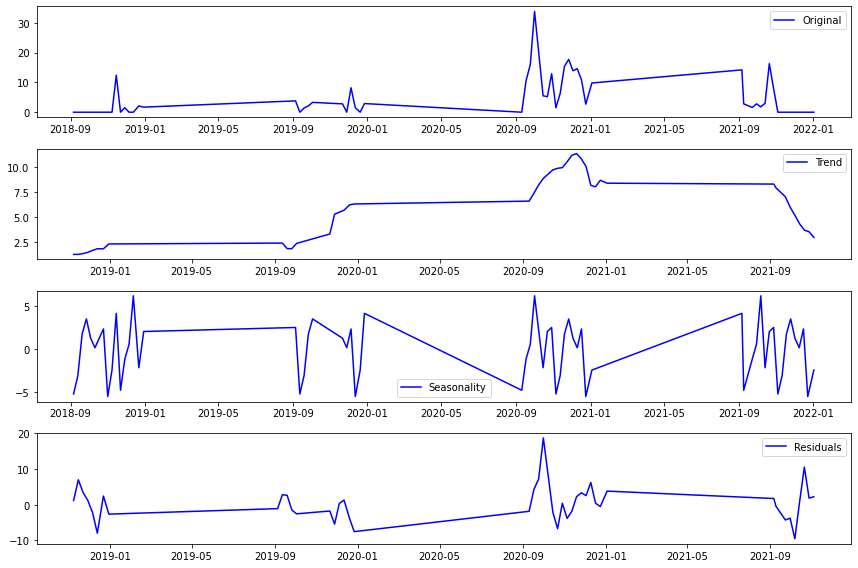

In [199]:
decomposition_plot(te_ts['Robert Tonyan (GB)'].dropna())

In [203]:
# Define function to build SARIMAX model, print summary and output diagnostic plots
def sarimax(ts, order=(1, 1, 1)):
    '''
    Input: 
    ts : Time series data.
    order : (p, d, q) values for ARIMA. Default = (1, 1, 1)
    seasonal_order : Seasonal (P, D, Q, s) values for SARIMA.
        Default = (1, 1, 1, 12).
        
    Output:
    Prints model output summary.
    Plots model diagnostics.
    
    Returns: Model output.
    '''
    
    # Sarimax model
    ARIMA = sm.tsa.statespace.ARIMA(ts, 
                                    order=order,  
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False)
                                            
    # Fit the model and print results
    output = ARIMA.fit()
    
    # Print output summary
    print(output.summary().tables[1])
    output.plot_diagnostics(figsize=(15,18));
    
    return output

In [204]:
sarimax(te_ts['Robert Tonyan (GB)'].dropna(), order=(1, 1, 1))

AttributeError: module 'statsmodels.tsa.statespace.api' has no attribute 'ARIMA'

In [175]:
# Empty list
te_train_ts = []
te_test_ts = []

# Return list of time series for each zipcode in our zip_list
for column in te_ts.columns.values:
        training_data = te_ts.loc[:'2021-01-03'][column].to_list()
        test_data = te_ts.loc['2021-09-06':][column].to_list()
        te_train_ts.append(training_data)
        te_test_ts.append(test_data)
        

te_test_ts

[[6.4,
  8.6,
  1.6,
  2.1,
  0.0,
  0.0,
  0.0,
  6.4,
  6.5,
  10.7,
  0.0,
  2.2,
  5.1,
  15.1,
  8.8,
  0.0,
  2.5],
 [1.0,
  9.2,
  2.1,
  1.6,
  4.2,
  8.9,
  9.3,
  5.4,
  14.7,
  0.0,
  2.2,
  14.5,
  7.1,
  4.7,
  13.1,
  8.9,
  5.5],
 [4.4,
  14.2,
  8.6,
  16.6,
  4.8,
  0.0,
  12.0,
  13.2,
  7.3,
  4.8,
  11.2,
  1.0,
  28.5,
  0.0,
  20.5,
  4.8,
  13.1],
 [3.8,
  10.5,
  26.0,
  17.8,
  13.9,
  12.9,
  0.0,
  3.1,
  9.4,
  2.4,
  11.3,
  15.6,
  9.3,
  1.4,
  20.7,
  22.2,
  11.4],
 [11.5,
  26.5,
  10.4,
  15.0,
  8.5,
  10.9,
  0.0,
  0.0,
  16.2,
  6.4,
  18.6,
  5.3,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [3.8,
  10.6,
  0.0,
  3.7,
  27.9,
  1.6,
  3.8,
  6.9,
  8.8,
  2.1,
  4.1,
  12.5,
  0.0,
  0.0,
  5.9,
  0.0,
  12.8],
 [9.7,
  8.1,
  14.9,
  20.7,
  20.7,
  7.5,
  0.0,
  0.0,
  0.0,
  2.7,
  14.0,
  18.2,
  3.4,
  19.0,
  7.8,
  9.1,
  0.0],
 [0.0,
  0.0,
  2.1,
  7.4,
  9.5,
  5.4,
  10.4,
  10.5,
  12.8,
  0.0,
  3.2,
  6.7,
  10.1,
  1.8,
  7.3,
  11.7,
  2

In [169]:
te_train_ts[0]

,Albert Okwuegbunam (DEN),Cole Kmet (CHI),Dallas Goedert (PHI),Dalton Schultz (DAL),Darren Waller (LV),David Njoku (CLE),Dawson Knox (BUF),Evan Engram (JAC),George Kittle (SF),Gerald Everett (LAC),...,Kyle Pitts (ATL),Mark Andrews (BAL),Mike Gesicki (MIA),Noah Fant (SEA),Pat Freiermuth (PIT),Robert Tonyan (GB),T.J. Hockenson (DET),Travis Kelce (KC),Tyler Higbee (LAR),Zach Ertz (ARI)
2017-09-07,NaN,NaN,NaN,NaN,NaN,4.0,NaN,8.4,7.7,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4,3.7,17.3
2017-09-14,NaN,NaN,NaN,NaN,NaN,11.7,NaN,14.9,3.3,12.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.3,0.0,14.7
2017-09-21,NaN,NaN,NaN,NaN,NaN,9.2,NaN,9.5,1.8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,1.4,17.5
2017-09-28,NaN,NaN,NaN,NaN,NaN,3.1,NaN,12.2,5.5,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.4,7.7,13.1
2017-10-05,NaN,NaN,NaN,NaN,NaN,13.9,NaN,0.0,21.3,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.8,13.8,18.1
2017-10-12,NaN,NaN,NaN,NaN,NaN,2.0,NaN,19.2,8.6,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7,1.0,15.8
2017-10-19,NaN,NaN,NaN,NaN,NaN,7.8,NaN,18.0,2.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,4.3,19.9
2017-10-26,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,4.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.3,NaN,13.4
2017-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,5.7,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.3,7.8,NaN
2017-11-09,NaN,NaN,NaN,NaN,NaN,1.3,NaN,15.1,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,NaN
